In [297]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


# Project: *heart desease prediction using machine learning Algorithm.*

# Somaire:

## 1.   Importing the Libraries
## 2.   Importing the Dataset
## 3.   Taking care of Mising values
## 4.   Taking care of duplicate values
## 5.   Data Pre-processing
## 6.   Encoding scaling
   

## 1. Importing the librarie

In [317]:
import pandas as pd

## 2. Importing the Dataset

In [318]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [319]:
data.shape


(1025, 14)

In [320]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 3. Taking care of Mising values

In [321]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## There is no any missing value in ours data set.

## 4.taking care of duplicate value

In [322]:
# checking if there is duplicated value
data_dup = data.duplicated().any()

In [323]:
data_dup

True

## After checking we see that we have duplicated value in ours data sets,now let drop the duplicates values

In [324]:
# dropping the duplicates value
data = data.drop_duplicates()

In [325]:
# checking if there is duplicated value after dropping.
data_dup = data.duplicated().any()
data_dup

False

## 5. Data Pre-processing

In this part we are going to performs Pre-processing

In [326]:
# separate the data to columns with numerical value and categorical value
# because we have to handle them separately
cate_val=[] # categorical column
num_val=[] # numerical column

for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
     num_val.append(column)

In [327]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [328]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## 6. Encoding scaling

Performs encoding for categorical value

In [329]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [330]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

 ## After checking the unique value of "cp" , we see that we have 4 values: 0,1,2,3.

## in this case some machine learning model can undertand there is a numerical order between the values, means somes also can understand order does matter,but this not the case.

## here we see that is no order it is just chest pain type.

## Now, we will convert these values into a binary vector, also for the other categorical columns. means this cp columns will convert into four columns. why because it have four unique values

dummy variable trap: the problem

In [331]:
cate_val.remove('sex')
cate_val.remove('target')

data = pd.get_dummies(data, columns = cate_val, drop_first = True)

here we will remove target and sex because this value contains and already 0 and 1.

encodind is not required for this variables

In [332]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## 7.feature scaling

Feature scaling allowed us to put ours features into the same scale so why do this,because it is essential to machine learning algorithm that calculated distance between data.

if it is not scale features with higher value range start dominating when calculating distances.

the machine learning algoritms requires that is most : K nearest neighbor neural networks support vectors machine ,linear regrssion and Logistic regression

those who dont required that are: mostly non linear machine learning algorithms,like decision tree ,random forest





In [333]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


As we can see, age,trestbps,chol,thalach and oldpeak, values of this columns are'nt in the sames scale.

That's why : we required feature sclaing

In [334]:
from sklearn.preprocessing import StandardScaler


In [335]:
# transform data in the same scale
st = StandardScaler()
data[num_val] = st.fit_transform(data[num_val])

In [336]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## 8.splitting the dataset into the training set and test set

In this part we want to split ours dataset into a training set and a testing set.

this allowed to evaluate the performce of ours ML

we will separate independent variable and dependent variable

In [337]:
# dependent variable
x = data.drop('target', axis=1)

In [338]:
# target variable
y = data['target']

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
# two set .train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state= 42)

In [341]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [342]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [343]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [344]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

## 13.Random Forest Classifier

In [374]:
from sklearn.ensemble import RandomForestClassifier

In [375]:
rf = RandomForestClassifier()

In [376]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [377]:
y_pred5 = rf.predict(x_test)

In [378]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

## 14.Gradient Boosting Classifier

In [379]:
from sklearn.ensemble import GradientBoostingClassifier

In [380]:
gbc = GradientBoostingClassifier()

In [381]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [382]:
y_pred6 = gbc.predict(x_test)

In [383]:
accuracy_score(y_test,y_pred6)

0.819672131147541

## we want to compare the models

In [384]:
final_data = pd.DataFrame({'Models' :['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test ,y_pred1),
                                  accuracy_score(y_test ,y_pred2),
                                  accuracy_score(y_test ,y_pred3),
                                  accuracy_score(y_test ,y_pred4),
                                  accuracy_score(y_test ,y_pred5),
                                  accuracy_score(y_test ,y_pred6)
                                  ]})

In [386]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.737705
4,RF,0.852459
5,GB,0.819672


 ## After we see that RandomForest is the best model in ours data set with accuracy arround:0.852459

In [387]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

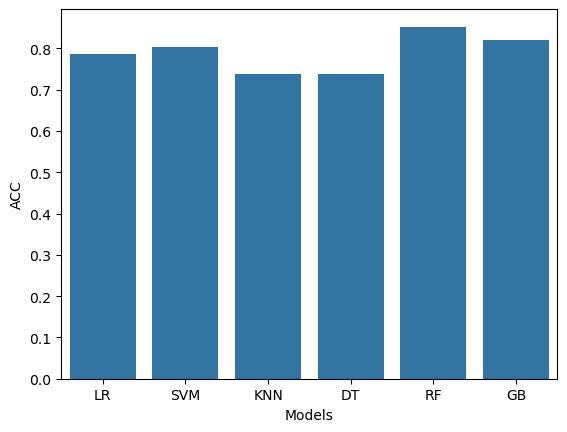

In [388]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


In [389]:
x = data.drop('target', axis=1)
y = data['target']

In [390]:
x.shape

(302, 13)

let train our random forest with te entire data set

In [391]:
from sklearn.ensemble import RandomForestClassifier

In [392]:
# instance to train our all dataset
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

## 15.Prediction on new Data

In [285]:
import pandas as pd

In [393]:
new_data =  pd.DataFrame({
    'age':[63],
    'sex':[1],
    'cp':[0],
    'trestbps':[145],
    'chol':[233],
    'fbs' :[1],
    'restecg':[2],
    'thalach':[150],
    'exang': [0],
    'oldpeak':[2.3],
    'slope':[2],
    'ca' :[0],
    'thal' :[2],


     },index=[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2


In [394]:
p = rf.predict(new_data)
if p[0] == 0:
  print('No Disease')
else:
  print('Disease')

Disease


In [395]:
new_data1 =  pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs' :0,
    'restecg':1,
    'thalach':168,
    'exang': 0,
    'oldpeak':1.0,
    'slope':2,
    'ca' :2,
    'thal' :3,


     },index=[0])
new_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [396]:
rf.predict(new_data)

array([1], dtype=int64)

In [397]:
p1 = rf.predict(new_data)
if p1[0] == 0:
  print('No Disease')
else:
  print('Disease')

Disease


save Model usin joblib

In [398]:
import joblib

In [399]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [400]:
model = joblib.load('model_joblib_heart')

In [401]:
model.predict(new_data)

array([1], dtype=int64)

In [402]:
from tkinter import *
import joblib

In [403]:
def show_entry_fields():
    try:
        # Récupération des valeurs saisies
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())

        # Chargement du modèle
        model = joblib.load('model_joblib_heart')

        # Création du DataFrame avec les bons noms de colonnes
        input_df = pd.DataFrame([[
            p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13
        ]], columns=[
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
        ])

        # Prédiction
        result = model.predict(input_df)

        # Affichage du résultat
        if result[0] == 0:
            output_label.config(text="✅ No Heart Disease", fg="green")
        else:
            output_label.config(text="❌ Heart Disease", fg="red")

    except Exception as e:
        output_label.config(text=f"Erreur: {e}", fg="orange")



master = Tk()
master.title("Heart Disease Prediction Using Machine Learning")

Label(master, text="Heart Disease Prediction Using Machine Learning", bg="black", fg="white").grid(row=0, columnspan=2, pady=10)

# Labels + Entry
Label(master, text="Enter Your Age").grid(row=1, sticky=W)
e1 = Entry(master)
e1.grid(row=1, column=1)

Label(master, text="Enter Your Sex (0=female, 1=male)").grid(row=2, sticky=W)
e2 = Entry(master)
e2.grid(row=2, column=1)

Label(master, text="Enter Chest Pain Type (0-3)").grid(row=3, sticky=W)
e3 = Entry(master)
e3.grid(row=3, column=1)

Label(master, text="Enter Resting Blood Pressure").grid(row=4, sticky=W)
e4 = Entry(master)
e4.grid(row=4, column=1)

Label(master, text="Enter Serum Cholesterol").grid(row=5, sticky=W)
e5 = Entry(master)
e5.grid(row=5, column=1)

Label(master, text="Fasting Blood Sugar (0 or 1)").grid(row=6, sticky=W)
e6 = Entry(master)
e6.grid(row=6, column=1)

Label(master, text="Resting ECG Results (0,1,2)").grid(row=7, sticky=W)
e7 = Entry(master)
e7.grid(row=7, column=1)

Label(master, text="Maximum Heart Rate Achieved").grid(row=8, sticky=W)
e8 = Entry(master)
e8.grid(row=8, column=1)

Label(master, text="Exercise Induced Angina (0 or 1)").grid(row=9, sticky=W)
e9 = Entry(master)
e9.grid(row=9, column=1)

Label(master, text="ST Depression").grid(row=10, sticky=W)
e10 = Entry(master)
e10.grid(row=10, column=1)

Label(master, text="Slope of Peak Exercise ST Segment").grid(row=11, sticky=W)
e11 = Entry(master)
e11.grid(row=11, column=1)

Label(master, text="Number of Major Vessels (0-3)").grid(row=12, sticky=W)
e12 = Entry(master)
e12.grid(row=12, column=1)

Label(master, text="Thal (1 = normal; 2 = fixed defect; 3 = reversible defect)").grid(row=13, sticky=W)
e13 = Entry(master)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=14, columnspan=2, pady=10)

# Label pour afficher le résultat
output_label = Label(master, text="", font=("Helvetica", 12))
output_label.grid(row=15, columnspan=2)

mainloop()